In [85]:
import pandas as pd
import datetime
import os
import numpy as np
from scipy import stats
from lazypredict.Supervised import LazyRegressor

In [86]:
parent_dir = "NOAA Space Weather Prediction Center - Real Time Solar Wind"

In [87]:
def read_data(path, skip_rows):
    dataset = pd.read_csv(path, skiprows =skip_rows,sep = r' +',engine = 'python',parse_dates = False)
    return dataset

def create_timestamp(year, month, day,hour):
    timestamp = datetime.datetime(int(year),int(month),int(day),int(hour))
    return timestamp

def embed_time_details_into_date(time,timestamp):
    hours_minutes = timestamp.split(':')
    full_information_timestamp = time.replace(hour=int(hours_minutes[0]),minute=int(hours_minutes[1]))
    return full_information_timestamp

def create_merge_feature(dataset):
    dataset['date'] = dataset.index
    dataset['date'] = pd.to_datetime(dataset['date'])
    dataset['date'] = dataset.apply(lambda dataFrame:embed_time_details_into_date(dataFrame['date'],dataFrame['Timestamp']),axis=1)
    dataset.drop(columns =['Timestamp'], axis=1,inplace =True)
    
def prepare_data_with_more_statistics(data_path, skip_rows):
    dataset = pd.read_csv(data_path, skiprows =skip_rows,sep = r' +',engine = 'python',parse_dates = False)
    dataset.drop(columns=dropped_columns, axis = 1, inplace = True)
    create_merge_feature(dataset)
    renamed_columns = dict()
    for column in dataset.columns:
        renamed_columns[column] = column.split('-')[0]
    dataset.rename(columns = renamed_columns,inplace =True)
    return dataset

def calculate_statistical_significance(dataset, label):
    for column in dataset.columns:
        if column != label and column!= 'date':
            corr,pval = stats.pearsonr(dataset[column],dataset[label])
            print("'{column}' has correlation of '{corr}' and pvalue of '{pval}'".format(column=column,corr=corr,pval=pval))
            
def extract_time_features(time):
    day = time.day
    month = time.month
    year = time.year
    hour = time.hour
    return day, month, year, hour

In [88]:
features = ['Source', 'Bt', 'Bx', 'By', 'Bz', 'Phi', 'Theta', 'Dens', 'Speed',
       'Temp', 'date']
dataset = pd.DataFrame(columns = features )

In [89]:
dataset

,Source,Bt,Bx,By,Bz,Phi,Theta,Dens,Speed,Temp,date


In [90]:
datasets_with_less_statistics =['rtsw_plot_data_2023-09-25T20_00_00.txt','rtsw_plot_data_2023-10-02T19_10_00.txt',
                               'rtsw_plot_data_2023-10-04T18_00_00.txt','rtsw_plot_data_2023-10-05T11_00_00.txt',
                               'rtsw_plot_data_2023-10-05T14_40_00.txt']
datasets_with_less_statistics_skip_rows =12

datasets_with_more_statistics = ['rtsw_plot_data_1998-01-01T00_00_00.txt','rtsw_plot_data_2019-05-03T16_00_00.txt',
                                 'rtsw_plot_data_2022-10-31T10_00_00.txt','rtsw_plot_data_2023-08-14T00_00_00.txt',
                                'rtsw_plot_data_2023-09-07T00_00_00.txt','rtsw_plot_data_2023-09-29T00_00_00.txt',
                                'rtsw_plot_data_2023-10-02T18_00_00.txt']

datasets_with_more_statistics_skip_rows = 13

dropped_columns = ['Bt-min', 'Bt-max','Bx-min','Bx-max', 'By-min', 'By-max','Bz-min', 'Bz-max','Phi-min', 'Phi-max','Theta-min', 'Theta-max',
                  'Dens-min', 'Dens-max','Speed-max','Speed-min','Temp-min', 'Temp-max']

In [91]:
for file_name in datasets_with_more_statistics:
    file_path = os.path.join(parent_dir, file_name)
    df = prepare_data_with_more_statistics(file_path,datasets_with_more_statistics_skip_rows)
    dataset = pd.concat([dataset,df], axis=0)

In [92]:
for file_name in datasets_with_less_statistics:
    file_path = os.path.join(parent_dir,file_name)
    df = pd.read_csv(file_path, skiprows =datasets_with_less_statistics_skip_rows,sep = r' +',engine = 'python',parse_dates = False)
    create_merge_feature(df)
    dataset = pd.concat([dataset,df],axis = 0)

In [93]:
dataset

,Source,Bt,Bx,By,Bz,Phi,Theta,Dens,Speed,Temp,date
1998-02-15,0,8.77,-4.83,2.10,1.88,160.87,14.01,4.52,400.10,54548,1998-02-15 00:00:00
1998-02-20,0,5.18,0.38,0.16,-0.17,179.36,-1.97,2.53,392.02,71561,1998-02-20 00:00:00
1998-02-25,0,4.87,1.16,0.56,0.22,154.52,2.34,2.71,359.05,57475,1998-02-25 00:00:00
1998-03-02,0,7.37,0.43,0.08,1.85,193.40,16.08,2.62,372.75,32613,1998-03-02 00:00:00
1998-03-07,0,5.83,-0.77,-0.53,0.13,203.18,1.23,2.74,303.19,20516,1998-03-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05,1,3.00,0.85,2.77,0.76,72.91,14.75,-99999.00,-99999.00,-99999,2023-10-05 16:35:00
2023-10-05,1,3.07,0.81,2.85,0.80,74.16,15.03,-99999.00,-99999.00,-99999,2023-10-05 16:35:00
2023-10-05,1,3.33,0.89,3.08,0.88,73.97,15.40,-99999.00,-99999.00,-99999,2023-10-05 16:35:00
2023-10-05,1,3.48,0.88,3.22,0.97,74.80,16.15,-99999.00,-99999.00,-99999,2023-10-05 16:35:00


In [94]:
Kp_path = "Kp Index/Kp and ap since 1932, daily updated.txt"
skip_rows = 29
Kp_index_dataset = pd.read_csv(Kp_path, skiprows =skip_rows,sep = r' +',engine = 'python',parse_dates = False)

In [95]:
Kp_index_dataset.head()


,#YYY,MM,DD,hh.h,hh._m,days,days_m,Kp,ap,D
0,1932,1,1,0.00,1.50,0.00,0.06,3.33,18,1
1,1932,1,1,3.00,4.50,0.12,0.19,2.67,12,1
2,1932,1,1,6.00,7.50,0.25,0.31,2.33,9,1
3,1932,1,1,9.00,10.50,0.38,0.44,2.67,12,1
4,1932,1,1,12.00,13.50,0.50,0.56,3.33,18,1


In [96]:
Kp_index_dataset['date'] = Kp_index_dataset.apply(lambda dataFrame: create_timestamp(dataFrame['#YYY'],dataFrame['MM'],dataFrame['DD'],dataFrame['hh.h']), axis = 1)

In [97]:
dataset = dataset.merge(Kp_index_dataset[['date','Kp']])

In [98]:
dataset.head()

,Source,Bt,Bx,By,Bz,Phi,Theta,Dens,Speed,Temp,date,Kp
0,0,8.77,-4.83,2.10,1.88,160.87,14.01,4.52,400.10,54548,1998-02-15,2.67
1,0,5.18,0.38,0.16,-0.17,179.36,-1.97,2.53,392.02,71561,1998-02-20,4.00
2,0,4.87,1.16,0.56,0.22,154.52,2.34,2.71,359.05,57475,1998-02-25,0.00
3,0,7.37,0.43,0.08,1.85,193.40,16.08,2.62,372.75,32613,1998-03-02,3.67
4,0,5.83,-0.77,-0.53,0.13,203.18,1.23,2.74,303.19,20516,1998-03-07,1.67


In [99]:
np.sum(dataset.isna())

Source    0
Bt        0
Bx        0
By        0
Bz        0
Phi       0
Theta     0
Dens      0
Speed     0
Temp      0
date      0
Kp        0
dtype: int64

In [100]:
dataset.sort_values(by = 'date', inplace = True)

In [101]:
dataset

,Source,Bt,Bx,By,Bz,Phi,Theta,Dens,Speed,Temp,date,Kp
0,0,8.77,-4.83,2.10,1.88,160.87,14.01,4.52,400.10,54548,1998-02-15 00:00:00,2.67
1,0,5.18,0.38,0.16,-0.17,179.36,-1.97,2.53,392.02,71561,1998-02-20 00:00:00,4.00
2,0,4.87,1.16,0.56,0.22,154.52,2.34,2.71,359.05,57475,1998-02-25 00:00:00,0.00
3,0,7.37,0.43,0.08,1.85,193.40,16.08,2.62,372.75,32613,1998-03-02 00:00:00,3.67
4,0,5.83,-0.77,-0.53,0.13,203.18,1.23,2.74,303.19,20516,1998-03-07 00:00:00,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5158,1,7.72,-6.30,4.18,-1.55,149.34,-11.50,4.13,393.80,117001,2023-10-03 18:00:00,2.00
5557,1,7.01,-6.38,2.10,-1.71,157.21,-14.13,4.76,393.50,115695,2023-10-03 21:00:00,2.00
5558,1,7.11,-5.34,4.67,-1.20,138.05,-9.59,4.78,398.60,116601,2023-10-03 21:00:00,2.00
5556,1,7.36,-6.51,2.49,-1.76,157.73,-13.79,4.68,393.20,119199,2023-10-03 21:00:00,2.00


In [103]:
def extract_time_features(time):
    day = time.day
    month = time.month
    year = time.year
    hour = time.hour
    return day, month, year, hour

In [104]:
dataset.tail()

,Source,Bt,Bx,By,Bz,Phi,Theta,Dens,Speed,Temp,date,Kp
5158,1,7.72,-6.30,4.18,-1.55,149.34,-11.50,4.13,393.80,117001,2023-10-03 18:00:00,2.00
5557,1,7.01,-6.38,2.10,-1.71,157.21,-14.13,4.76,393.50,115695,2023-10-03 21:00:00,2.00
5558,1,7.11,-5.34,4.67,-1.20,138.05,-9.59,4.78,398.60,116601,2023-10-03 21:00:00,2.00
5556,1,7.36,-6.51,2.49,-1.76,157.73,-13.79,4.68,393.20,119199,2023-10-03 21:00:00,2.00
5559,1,7.07,-5.20,4.68,-1.23,137.43,-9.96,4.78,397.40,113738,2023-10-03 21:00:00,2.00


In [57]:
calculate_statistical_significance(dataset, 'Kp')

'Source' has correlation of '-0.01347676345658274' and pvalue of '0.31503167696067275'
'Bt' has correlation of '-0.00870712668995918' and pvalue of '0.5162629006019671'
'Bx' has correlation of '-0.008739647661065688' and pvalue of '0.5146971217890504'
'By' has correlation of '-0.00873426194099176' and pvalue of '0.5149562560966197'
'Bz' has correlation of '-0.008752286186996344' and pvalue of '0.5140892843452549'
'Phi' has correlation of '-0.008741390269531673' and pvalue of '0.5146132905669016'
'Theta' has correlation of '-0.008878720289723675' and pvalue of '0.5080291682240293'
'Dens' has correlation of '-0.015326544637263486' and pvalue of '0.25318800882489806'
'Speed' has correlation of '-0.014096965182256671' and pvalue of '0.29327612222853017'
'Temp' has correlation of '0.23655118635389333' and pvalue of '1.4356881952183711e-71'


In [60]:
y_train = dataset['Kp'][:4448]
y_test = dataset['Kp'][4448:]
dataset.drop(columns = ['Kp','date'], inplace=True, axis=1)
x_train = dataset[:4448]
x_test = dataset[4448:]

In [68]:
regressor = LazyRegressor(verbose = 1, ignore_warnings=False)

In [69]:
models, predictions = regressor.fit(x_train,x_test,y_train,y_test)

  2%|██                                                                                 | 1/41 [00:00<00:11,  3.46it/s]

AdaBoostRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 

 10%|████████                                                                           | 4/41 [00:00<00:05,  6.50it/s]

BaggingRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 3

 15%|████████████▏                                                                      | 6/41 [00:00<00:04,  8.69it/s]

DummyRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 307

 20%|████████████████▏                                                                  | 8/41 [00:01<00:03,  8.76it/s]

ExtraTreeRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912,

 22%|██████████████████▏                                                                | 9/41 [00:02<00:10,  3.02it/s]

ExtraTreesRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912

 27%|██████████████████████                                                            | 11/41 [00:05<00:25,  1.18it/s]

GaussianProcessRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 

 29%|████████████████████████                                                          | 12/41 [00:06<00:25,  1.12it/s]

GradientBoostingRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787,

 34%|████████████████████████████                                                      | 14/41 [00:07<00:18,  1.45it/s]

HistGradientBoostingRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192

 44%|████████████████████████████████████                                              | 18/41 [00:08<00:10,  2.26it/s]

KernelRidge model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 307481

 49%|████████████████████████████████████████                                          | 20/41 [00:09<00:06,  3.07it/s]

Lasso model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 307481, 2583

 54%|████████████████████████████████████████████                                      | 22/41 [00:09<00:04,  3.99it/s]

LassoLars model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 307481, 

 59%|████████████████████████████████████████████████                                  | 24/41 [00:09<00:03,  5.16it/s]

LinearRegression model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 3

 61%|██████████████████████████████████████████████████                                | 25/41 [00:09<00:03,  4.74it/s]

LinearSVR model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 307481, 

 63%|████████████████████████████████████████████████████                              | 26/41 [00:10<00:05,  2.76it/s]

MLPRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 30748

 71%|██████████████████████████████████████████████████████████                        | 29/41 [00:11<00:03,  3.11it/s]

NuSVR model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 307481, 2583

 78%|████████████████████████████████████████████████████████████████                  | 32/41 [00:12<00:01,  4.66it/s]

PoissonRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 3

 85%|██████████████████████████████████████████████████████████████████████            | 35/41 [00:14<00:02,  2.21it/s]

RandomForestRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 699

SGDRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 30748

 95%|██████████████████████████████████████████████████████████████████████████████    | 39/41 [00:15<00:00,  2.87it/s]

SVR model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 307481, 258330

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:16<00:00,  3.41it/s]

XGBRegressor model failed to execute
Found unknown categories [30722, 192519, 34826, 182284, 77838, 73747, 94231, 18455, 83993, 165919, 180256, 8225, 36899, 75813, 61477, 51242, 67627, 346157, 71727, 14384, 116785, 178226, 75831, 41020, 51261, 90174, 59455, 276542, 51266, 122948, 67657, 49228, 43085, 79951, 24657, 63569, 43090, 18519, 237656, 82008, 155737, 243804, 12384, 127072, 28770, 67682, 278629, 14438, 8296, 34922, 41067, 131180, 92267, 47214, 59501, 8307, 184436, 133236, 61564, 57469, 16510, 65669, 32902, 51335, 268423, 340103, 139402, 55433, 188550, 20621, 137358, 92304, 186514, 49300, 86168, 53402, 94363, 125086, 143520, 16547, 47271, 102573, 49326, 184494, 176304, 75957, 75958, 98488, 159931, 24764, 14530, 104643, 180420, 168135, 223432, 112839, 16591, 35033, 45276, 35043, 51428, 80101, 39142, 41191, 110824, 37092, 403690, 8426, 45293, 39155, 200948, 377083, 69886, 94464, 37121, 391427, 49412, 137478, 117001, 237834, 336140, 160013, 129294, 47375, 239887, 192787, 69912, 30748

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:16<00:00,  2.53it/s]


In [66]:
print(models)

Empty DataFrame
Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
Index: []


In [67]:
x_train

,Source,Bt,Bx,By,Bz,Phi,Theta,Dens,Speed,Temp
0,0,8.77,-4.83,2.10,1.88,160.87,14.01,4.52,400.10,54548
1,0,5.18,0.38,0.16,-0.17,179.36,-1.97,2.53,392.02,71561
2,0,4.87,1.16,0.56,0.22,154.52,2.34,2.71,359.05,57475
3,0,7.37,0.43,0.08,1.85,193.40,16.08,2.62,372.75,32613
4,0,5.83,-0.77,-0.53,0.13,203.18,1.23,2.74,303.19,20516
...,...,...,...,...,...,...,...,...,...,...
3700,1,7.62,3.73,-5.14,1.44,307.90,11.92,4.92,432.70,113276
3701,1,8.41,3.41,-7.00,1.06,297.50,7.33,5.31,411.00,74786
4687,1,7.66,3.51,-6.09,-0.16,298.54,-1.28,4.42,422.70,86789
4688,1,7.66,3.96,-4.06,4.22,314.74,33.90,5.99,459.40,383950


In [80]:
from sklearn import linear_model
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import PoissonRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Ahmed
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

#Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [71]:
def compare_orgin_predict(y_test,y_pred,N=40):
  x_ax = range(len(y_test[:N]))
  plt.plot(x_ax, y_test[:N], label="original")
  plt.plot(x_ax, y_pred[:N], label="predicted")
  plt.title("Flight Price test and predicted data")
  plt.xlabel('Observation Number')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

In [77]:

models = {
    #Norhan
    "PR"  : linear_model.PoissonRegressor(),
    #Mohammed
    "LR": linear_model.LinearRegression(),
    "GBR": ensemble.GradientBoostingRegressor(),
    "ETR": ensemble.ExtraTreesRegressor(),
    # "KNNR": KNeighborsRegressor(),
    #Ahmed
    "BR": BaggingRegressor(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()   
}

Using model: PR
Training Score: 0.0
Test Score: -0.040044220523962615
r2_score: -0.038301238278651395
MSE: 1.59866098799239
RMSE: 1.2643816623126065
MAE: 0.9671807828916722
----------------------------------------


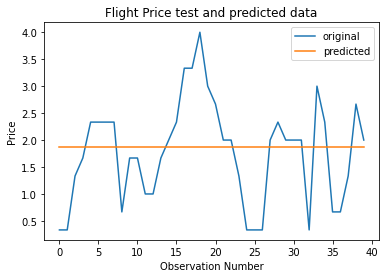

----------------------------------------
Using model: LR
Training Score: 0.3079427514784723
Test Score: 0.34172230361925093
r2_score: 0.34172230361925093
MSE: 1.0135429234526037
RMSE: 1.006748689322516
MAE: 0.7921124998839323
----------------------------------------


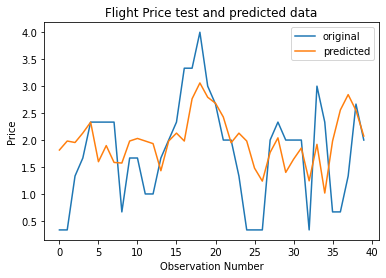

----------------------------------------
Using model: GBR
Training Score: 0.41925576537524567
Test Score: 0.367264700981503
r2_score: 0.367264700981503
MSE: 0.9742155753791986
RMSE: 0.9870235941350128
MAE: 0.7701133671255862
----------------------------------------


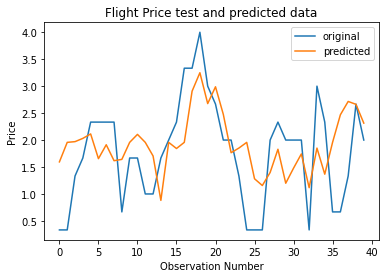

----------------------------------------
Using model: ETR
Training Score: 0.9233778414795693
Test Score: 0.26734208234674917
r2_score: 0.26734208234674917
MSE: 1.1280653314425269
RMSE: 1.0621041998987326
MAE: 0.8270864327570202
----------------------------------------


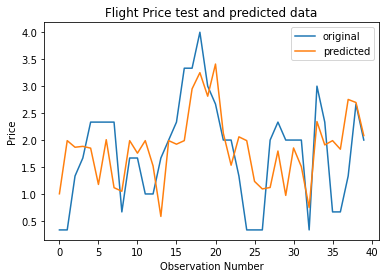

----------------------------------------
Using model: BR
Training Score: 0.798071667149328
Test Score: 0.26194808127411207
r2_score: 0.26194808127411207
MSE: 1.1363704155222782
RMSE: 1.066006761480563
MAE: 0.8410419553988702
----------------------------------------


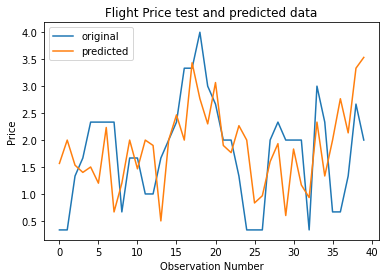

----------------------------------------
Using model: DT
Training Score: 0.9233778414795693
Test Score: -0.2601674972053267
r2_score: -0.2601674972053267
MSE: 1.9402660247791277
RMSE: 1.392934321775125
MAE: 1.079950452541193
----------------------------------------


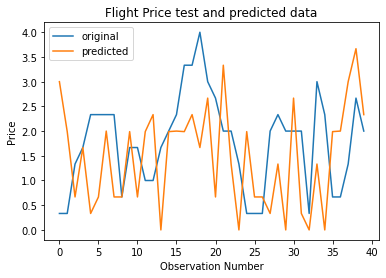

----------------------------------------
Using model: RF
Training Score: 0.8349337533369808
Test Score: 0.3217168353834653
r2_score: 0.3217168353834653
MSE: 1.0443451226949862
RMSE: 1.021932053854358
MAE: 0.8012533336259157
----------------------------------------


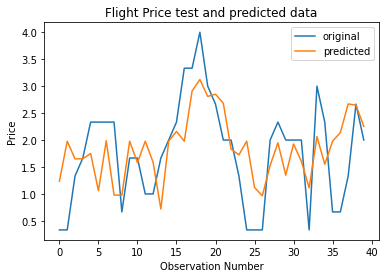

----------------------------------------


In [81]:
for name, model in models.items():

    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    
    y_pred = model.predict(x_test)
    print(f'r2_score: {r2_score(y_test,y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

    print('-'*40)
    compare_orgin_predict(y_test,y_pred)
    print('-'*40)